In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


import datetime
from sklearn import linear_model

In [2]:
df = pd.DataFrame(pd.read_csv('Complete_SEDS.csv'))
df.head()

,Data_Status,MSN,StateCode,Year,Data
0,2020F,ABICB,AK,1960,0.0
1,2020F,ABICB,AK,1961,0.0
2,2020F,ABICB,AK,1962,0.0
3,2020F,ABICB,AK,1963,0.0
4,2020F,ABICB,AK,1964,0.0


In [3]:
df = df[df['StateCode']=='WA']
df = df[df.Year >= 2008]
df = df[(df.MSN == 'TETCB')]
df

,Data_Status,MSN,StateCode,Year,Data
1672658,2020F,TETCB,WA,2008,2041958.0
1672659,2020F,TETCB,WA,2009,2031913.0
1672660,2020F,TETCB,WA,2010,2007894.0
1672661,2020F,TETCB,WA,2011,2051660.0
1672662,2020F,TETCB,WA,2012,2011343.0
1672663,2020F,TETCB,WA,2013,2035649.0
1672664,2020F,TETCB,WA,2014,2008907.0
1672665,2020F,TETCB,WA,2015,1995985.0
1672666,2020F,TETCB,WA,2016,2056396.0
1672667,2020F,TETCB,WA,2017,2075340.0


In [4]:
features = ['Year','Data']
df = df[(df.MSN == 'TETCB')]
df = df[features]
df.head()

,Year,Data
1672658,2008,2041958.0
1672659,2009,2031913.0
1672660,2010,2007894.0
1672661,2011,2051660.0
1672662,2012,2011343.0


In [5]:
X = df.iloc[:,1].values
Y = df.iloc[:,0].values

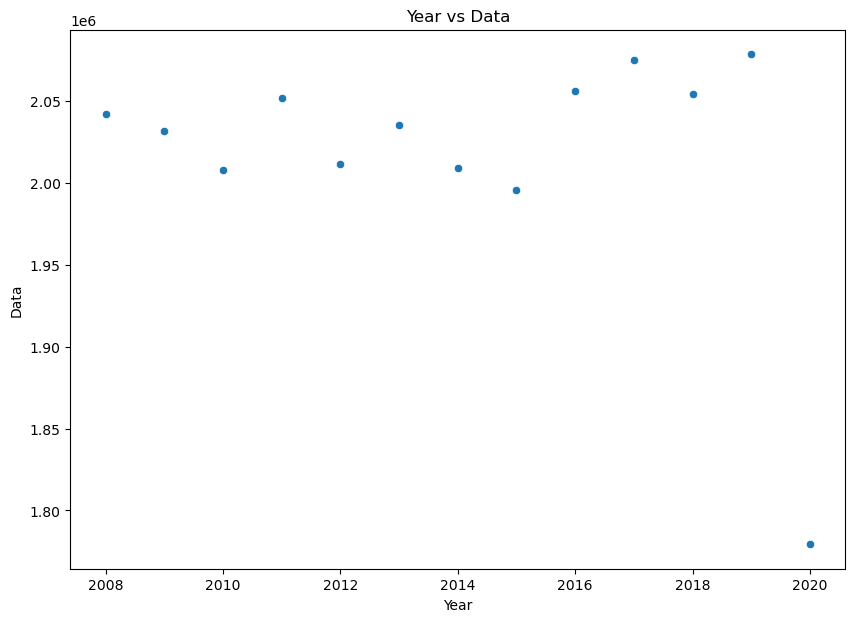

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline



fig=plt.figure(figsize = (10, 7))
sns.scatterplot(x="Year", y="Data", data=df)
plt.title('Year vs Data')
plt.xlabel('Year')
plt.ylabel('Data')

plt.show()

In [7]:
import pandas as pd

# Load the XLSX file into a pandas DataFrame
df = pd.read_excel("use_tot_sector.xlsx", sheet_name="Transportation Sector")

# Write the DataFrame to a CSV file
df.to_csv("use_tot_sector.csv", index=False)

In [8]:
df = pd.DataFrame(pd.read_csv('use_tot_sector.csv'))
df

,"Total energy consumption in the transportation sector, billion Btu",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,AK,27139.0,31895.0,34182.0,32387.0,32246.0,34379.0,36233.0,43862.0,47177.0,...,184846.0,167929.0,151923.0,155043.0,162888.0,153572.0,155868.0,163804.0,164258.0,164595.0
3,AL,176015.0,172023.0,179802.0,189395.0,190545.0,200727.0,206854.0,216031.0,242554.0,...,478191.0,472022.0,466359.0,465284.0,480784.0,504527.0,498739.0,488594.0,500768.0,497755.0
4,AR,104652.0,114214.0,116715.0,123586.0,130214.0,129593.0,136348.0,139183.0,153822.0,...,287138.0,277918.0,276347.0,280150.0,276984.0,283503.0,285148.0,286192.0,288865.0,271075.0
5,AZ,116689.0,121239.0,129736.0,136740.0,143720.0,139441.0,148689.0,159735.0,183623.0,...,513043.0,502603.0,510887.0,516809.0,526892.0,539916.0,543230.0,554065.0,569796.0,507885.0
6,CA,1224448.0,1292718.0,1316805.0,1354256.0,1421236.0,1491493.0,1592738.0,1654402.0,1779333.0,...,2828580.0,2773267.0,2777173.0,2798542.0,2865537.0,2970922.0,3049442.0,3062408.0,3059749.0,2355476.0
7,CO,104450.0,114878.0,122860.0,129258.0,133723.0,138618.0,147575.0,154378.0,172368.0,...,414063.0,410843.0,411940.0,424103.0,421452.0,430222.0,434641.0,449492.0,460280.0,378289.0
8,CT,116898.0,125496.0,130768.0,134750.0,137397.0,140533.0,150121.0,155282.0,168490.0,...,234687.0,228721.0,225149.0,225365.0,227198.0,229142.0,232069.0,237351.0,233235.0,196110.0
9,DC,28823.0,29581.0,29525.0,29602.0,31091.0,33820.0,33780.0,32459.0,32904.0,...,21211.0,19112.0,19420.0,20902.0,20276.0,21250.0,18441.0,20300.0,21802.0,16806.0


In [9]:
df_testing = df.loc[1]
df_testing

Total energy consumption in the transportation sector, billion Btu     State
Unnamed: 1                                                            1960.0
Unnamed: 2                                                            1961.0
Unnamed: 3                                                            1962.0
Unnamed: 4                                                            1963.0
                                                                       ...  
Unnamed: 57                                                           2016.0
Unnamed: 58                                                           2017.0
Unnamed: 59                                                           2018.0
Unnamed: 60                                                           2019.0
Unnamed: 61                                                           2020.0
Name: 1, Length: 62, dtype: object

In [10]:
df_WA = df.loc[49]
df_WA

Total energy consumption in the transportation sector, billion Btu          WA
Unnamed: 1                                                            180038.0
Unnamed: 2                                                            184221.0
Unnamed: 3                                                            191597.0
Unnamed: 4                                                            193702.0
                                                                        ...   
Unnamed: 57                                                           680677.0
Unnamed: 58                                                           656410.0
Unnamed: 59                                                           656582.0
Unnamed: 60                                                           676682.0
Unnamed: 61                                                           504756.0
Name: 49, Length: 62, dtype: object

In [11]:
df = pd.DataFrame((df_WA, df_testing))
df

,"Total energy consumption in the transportation sector, billion Btu",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
49,WA,180038.0,184221.0,191597.0,193702.0,200152.0,206180.0,224455.0,248016.0,282703.0,...,570277.0,571883.0,585103.0,572869.0,611895.0,680677.0,656410.0,656582.0,676682.0,504756.0
1,State,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0


In [12]:
x=df.iloc[1].values
y=df.iloc[0].values
x = np.delete(x, 0)
y = np.delete(y, 0)
x

array([1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0,
       1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0,
       1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0,
       1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0,
       1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
       2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
       2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
       2016.0, 2017.0, 2018.0, 2019.0, 2020.0], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

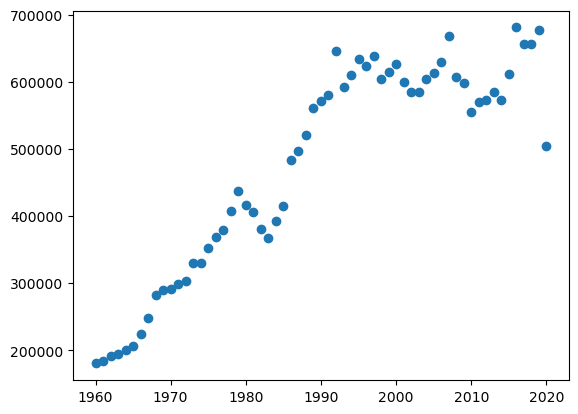

In [13]:
plt.scatter(x,y)
plt.show

<BarContainer object of 61 artists>

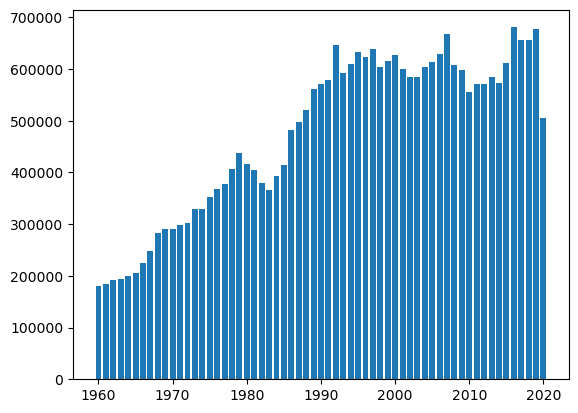

In [14]:
plt.bar(x,y)

In [15]:
X=x

X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
print (xtrain[0:10, :])

[[ 1.05876909]
 [-1.28715539]
 [-0.89616798]
 [ 0.10922823]
 [ 1.17047978]
 [-0.0583378 ]
 [ 0.66778168]
 [ 1.39390116]
 [-0.6727466 ]
 [ 1.50561185]]


In [18]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
from sklearn import datasets, linear_model, metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score

classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [19]:
classifier.predict(X_train)

array([[625727.91246326],
       [284845.37253881],
       [341659.12919289],
       [487751.64630336],
       [641960.41436442],
       [463402.89345161],
       [568914.15580918],
       [674425.41816675],
       [374124.13299521],
       [690657.92006791],
       [447170.39155045],
       [349775.38014347],
       [268612.87063765],
       [479635.39535278],
       [357891.63109405],
       [650076.665315  ],
       [390356.63489638],
       [698774.17101849],
       [292961.62348939],
       [333542.8782423 ],
       [430937.88964929],
       [528332.90105627],
       [366007.88204463],
       [593262.90866093],
       [617611.66151267],
       [666309.16721617],
       [536449.15200685],
       [236147.86683532],
       [325426.62729172],
       [601379.15961151],
       [422821.6386987 ],
       [276729.12158823],
       [414705.38774812],
       [520216.65010569],
       [633844.16341384],
       [398472.88584696],
       [382240.38394579],
       [301077.87443997],
       [5445

Text(0, 0.5, 'Consumption in BTU')

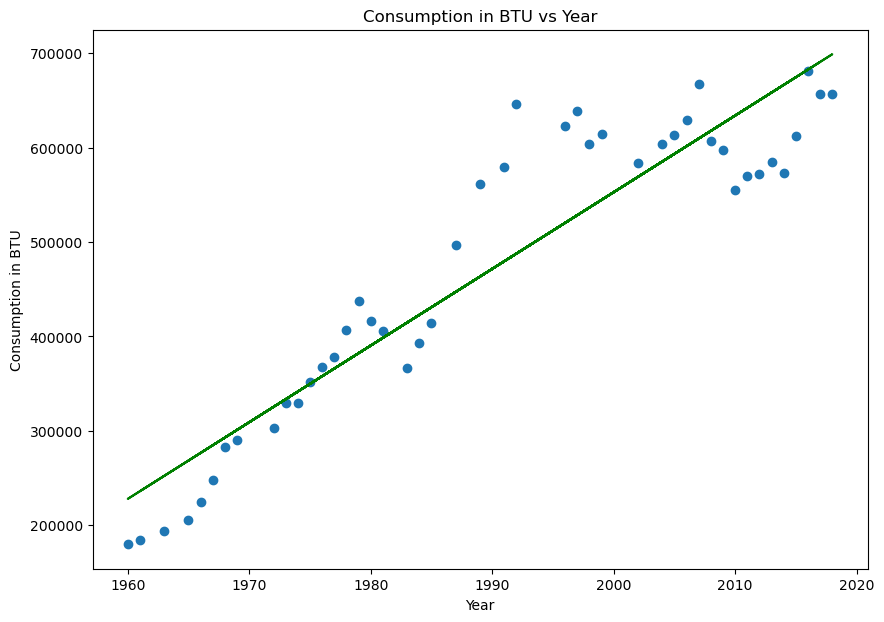

In [20]:
x=X_train
y=y_train
n = np.size(x)

y_pred = classifier.predict(X_train)
    
fig=plt.figure(figsize = (10, 7))
plt.title('Consumption in BTU vs Year')
plt.scatter(x,y)
plt.plot(x, y_pred, color = 'green')
plt.xlabel('Year')
plt.ylabel('Consumption in BTU')

In [21]:
print('Variance score: {}'.format(classifier.score(X_test, y_test)))

Variance score: 0.714134397638167


In [22]:
# model evaluation
mse=mean_squared_error(y,y_pred)
  
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
  
# printing values
print('Slope:' ,classifier.coef_)
print('Intercept:', classifier.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8116.25095058]]
Intercept: [-15679820.2472561]
MSE: 3321290549.3232965
Root mean squared error:  57630.63898069582
R2 score:  0.8640810817477779


 Using Electrical Production Data
 = 
 

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import IPython
import IPython.display

In [24]:
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam

In [25]:
df = pd.DataFrame(pd.read_csv('annual_generation_WA.csv'))
df.pop("Solar Thermal and Photovoltaic")
df

,Hydroelectric Conventional,Wind,Wood and Wood Derived Fuels,Coal,Petroleum,Natural Gas,Nuclear,Pumped Storage,Other Gases,Other Biomass,Other,Total
0,8.746671e+07,0.0,1122771.00,7390279.00,42981.00,288058.00,5742027.0,0.0,8460.00,6499.00,3750.00,1.020715e+08
1,8.934240e+07,0.0,717827.00,7944779.00,31164.00,460424.00,4229868.0,0.0,97467.00,46633.00,3.00,1.028706e+08
2,6.832466e+07,0.0,1100901.00,9658148.00,25745.00,1273763.00,5692379.0,0.0,234023.00,172810.00,1.00,8.648243e+07
3,6.731238e+07,0.0,1018120.00,8835079.00,59434.00,3197945.00,7134966.0,0.0,222852.00,214990.00,7.00,8.799578e+07
4,6.557549e+07,0.0,1018660.00,9831332.00,45419.00,4820582.00,6739749.0,0.0,299161.00,224804.00,31282.00,8.858648e+07
5,8.250015e+07,0.0,1035788.00,5902945.00,178915.00,4889604.00,6941878.0,0.0,550836.00,197288.00,179.00,1.021976e+08
6,9.851786e+07,0.0,1121105.00,8067127.00,187236.00,4707267.00,5588000.0,0.0,300221.00,167369.00,1952.00,1.186581e+08
7,1.041706e+08,0.0,1017734.00,6990519.00,228589.00,2961661.00,6244135.0,0.0,290495.00,222483.00,0.00,1.221262e+08
8,7.981465e+07,0.0,1120311.00,9312205.00,87043.00,4346349.00,6916065.0,0.0,348881.00,211461.00,1541.00,1.021585e+08
9,9.698938e+07,0.0,1129311.00,8692479.00,51495.00,3707237.00,6085893.0,0.0,221354.00,206823.00,44.00,1.170840e+08


In [26]:
#splitting data
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)] 
test_df = df[int(n*0.8):]

num_features = df.shape[1]
len(train_df)

25

In [27]:
#normalization of data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
y_test = test_df
y_train = train_df
X_train = np.arange(24)
X_test = np.arange(25,31)
X_test

array([25, 26, 27, 28, 29, 30])

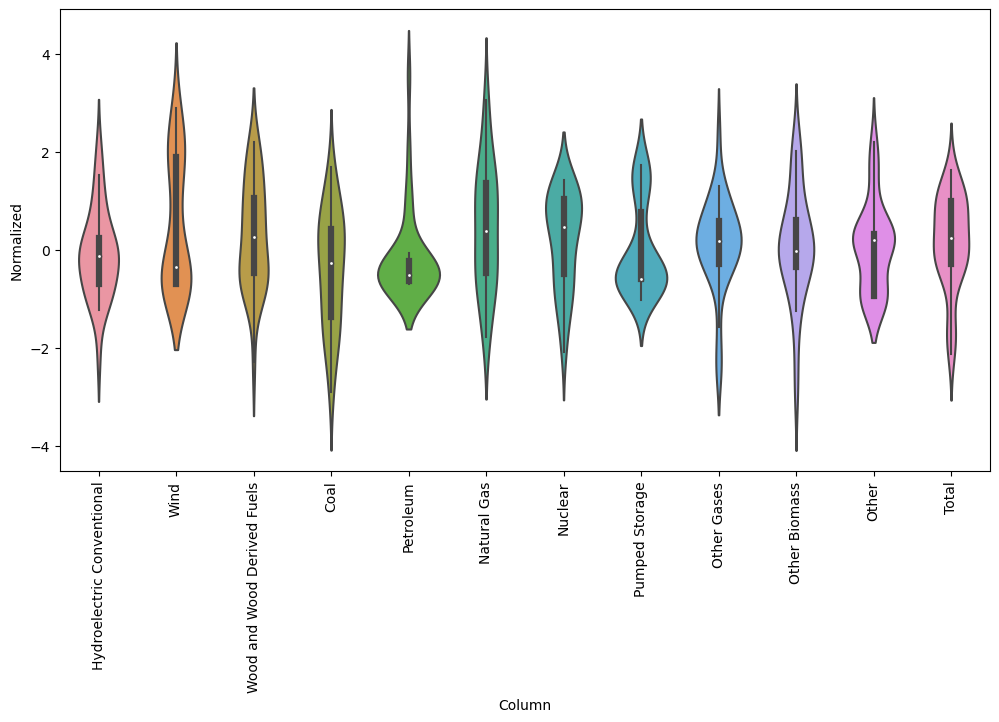

In [28]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [29]:
from keras.datasets import mnist

#Importing the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test
#Normalizing the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [32]:
#Initializing the Network
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [33]:
#Compiling the network
model.compile( loss='mean_squared_error',
              optimizer=Adam(lr=0.05, decay=1e-6),
              metrics=['accuracy'] )

#Fitting the data to the model
model.fit(X_train,
         y_train,
          epochs=3,
          validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 42s 21ms/step - loss: 27.3046 - accuracy: 0.0984 - val_loss: 27.2503 - val_accuracy: 0.0980
Epoch 2/3
1875/1875 [==============================] - 41s 22ms/step - loss: 27.3046 - accuracy: 0.0991 - val_loss: 27.2503 - val_accuracy: 0.1135
Epoch 3/3
1875/1875 [==============================] - 46s 25ms/step - loss: 27.3046 - accuracy: 0.0994 - val_loss: 27.2503 - val_accuracy: 0.0892


In [34]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 [==============================] - 2s 8ms/step - loss: 27.2503 - accuracy: 0.0892
Test Loss: 27.25031280517578
Test Accuracy: 0.08919999748468399


In [35]:
pred = model.predict()

TypeError: predict() missing 1 required positional argument: 'x'